# Uncertainties in Maximum Likelihood Method
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [3]:
import math
from ROOT import *
import numpy as np
from array import array

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [4]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) PDF for the outcome of the experiment

Mean and sigma from 10 measurements

In [45]:
Np=10
x0 = 1
sigma0 = 2
   
def myll(x, par):
    
    mu  = x[1]
    sig = x[0]

    mull = -Np/2/sigma0**2 * (mu-x0)**2
    nsig2 = Np*sig*sig/sigma0/sigma0
    k = (Np-1)/2
    sigll = (k-1) * np.log(nsig2) - 0.5*nsig2
    
# Additional log(sig) from changing variables \sigma^2 -> \sigma

    return mull + sigll + np.log(sig)
    


### (3) Define root function

In [46]:
Xmin= -2
Xmax=  4
Nxbin = 100

Smin=  0.
Smax=  5.
Nsbin = 100

fsm = TF2('fsm',myll,Smin, Smax,Xmin,Xmax)

fsm.SetNpx(Nsbin)
fsm.SetNpy(Nxbin)


### (4) Plot results

3.8580145835876465


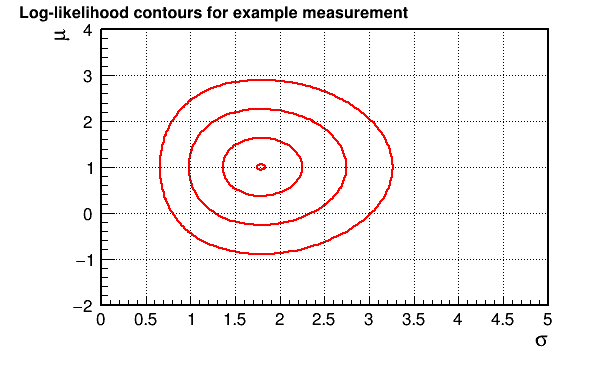

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp
Info in <TCanvas::Print>: png file 05_mlm_func2.png has been created


In [47]:
# Lin scale

gStyle.SetOptLogy(0)
gStyle.SetOptLogz(0)

# Create plot canvas for two plots

cexp = TCanvas('cexp')
   
# Get function histogram

hsm = fsm.GetHistogram()
hsm.SetNameTitle("hsm","Log-likelihood contours for example measurement")

# Axis description

hsm.GetYaxis().SetTitle("#mu")
hsm.GetXaxis().SetTitle("#sigma")
hsm.GetYaxis().SetTitleOffset(0.7)

# Plot

Zmax = hsm.GetMaximum()
print(Zmax)

zcont = np.array([Zmax-4.5, Zmax-2, Zmax-0.5, Zmax-0.005])
hsm.SetContour(4,zcont)
hsm.DrawCopy('cont3')


cexp.Update()
fname = '05_mlm_func2.png'
cexp.Print(fname)

Image(filename=fname)